In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
a = pd.read_csv('./toy.csv')
d = a.values
print d.shape

(100, 3)


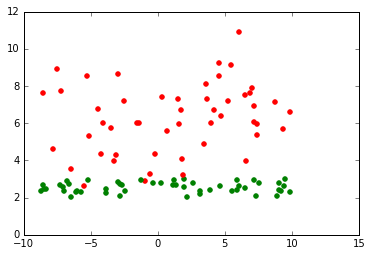

In [9]:
for ix in range(100):
    if d[ix, 2] == 1:
        plt.scatter(d[ix, 0], d[ix, 1], color='red')
    else:
        plt.scatter(d[ix, 0], d[ix, 1], color='green')

In [11]:
class LogisticRegression:

    def __init__(self,X,y,tolerance=1e-5):
        self.tolerance = tolerance
        self.labels = y.reshape(y.size,1)
        self.w = np.zeros((X.shape[1]+1,1))
        self.X = X
        self.mean_x = X.mean(axis=0)
        self.std_x = X.std(axis=0)
        self.features = np.ones((X.shape[0],X.shape[1]+1))
        self.features[:,1:] = (X-self.mean_x)/self.std_x
        self.shuffled_features = self.features
        self.shuffled_labels = self.labels
        self.likelihood_history = []



    def log_likelihood(self):
        p = self.probability()
        loglikelihood = self.labels*np.log(p+1e-24) + (1-self.labels)*np.log(1-p+1e-24)
        return -1*loglikelihood.sum()

    def probability(self):
        return 1/(1+np.exp(-self.features.dot(self.w)))

    def log_likelihood_gradient(self): 
        error = self.labels-self.probability()
        product = error*self.features
        return product.sum(axis=0).reshape(self.w.shape)

    def gradient_decent(self,alpha=1e-7,max_iterations=1e4):
        
        previous_likelihood = self.log_likelihood()
        difference = self.tolerance+1
        iteration = 0
        self.likelihood_history = [previous_likelihood]
        while (difference > self.tolerance) and (iteration < max_iterations):
            self.w = self.w + alpha*self.log_likelihood_gradient()
            temp = self.log_likelihood()
            difference = np.abs(temp-previous_likelihood)
            previous_likelihood = temp
            self.likelihood_history.append(previous_likelihood)
            iteration += 1
            
            
            
    def stocastic_gradient_decent(self,alpha=0.1,max_iterations=1e2):
        difference = self.tolerance+1.
        previous_likelihood = self.log_likelihood()
        rows = range(len(self.features))
        np.random.shuffle(rows)
        self.shuffled_features = self.shuffled_features[rows,:]
        self.shuffled_labels = self.shuffled_labels[rows]
        iteration = 0
        self.likelihood_history = [previous_likelihood]
        
        while (difference > self.tolerance) & (iteration < max_iterations):
            for i in xrange(len(self.features)):
                self.w = self.w + alpha*self.row_log_likelihood_gradient(i)
            temp = self.log_likelihood()
            difference = np.abs(temp - previous_likelihood)
            
            #print previous_likelihood, temp, difference
            
            previous_likelihood = temp    

            np.random.shuffle(rows)
            self.shuffled_features = self.shuffled_features[rows,:]
            self.shuffled_labels = self.shuffled_labels[rows]
            iteration += 1
            self.likelihood_history.append(previous_likelihood)

    def predict_probabilty(self,X):
        features = np.ones((X.shape[0],X.shape[1]+1))
        features[:,1:] = (X-self.mean_x)/self.std_x
        return 1/(1+np.exp(-features.dot(self.w)))

    def get_coefficients(self):
        new_coef = self.w.T[0]/np.hstack((1,self.std_x))
        new_coef[0] = self.w.T[0][0]-(self.mean_x*self.w.T[0][1:]/self.std_x).sum()
        return new_coef